# 1. 붓꽃 분류 - KNN 직접 구현

In [1]:
# data load
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

print(X_train.shape)
print(X_train[0])

print(y_train.shape)
print(y_train[0])

(120, 4)
[5.1 2.5 3.  1.1]
(120,)
1


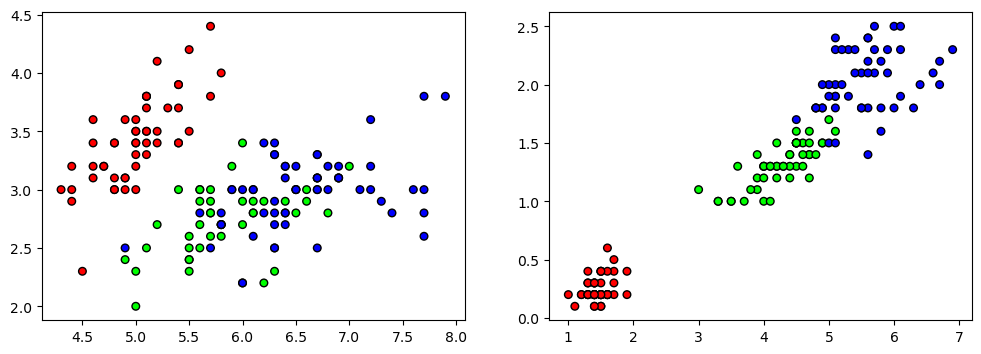

In [2]:
# 시각화
import matplotlib.pyplot as plt
from matplotlib.colors import  ListedColormap
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

fig = plt.figure(figsize = (12,4))
fig.add_subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap, edgecolor = 'k', s = 30)
fig.add_subplot(1,2,2)
plt.scatter(X[:, 2], X[:, 3], c = y, cmap = cmap, edgecolor = 'k', s = 30)
plt.show()

In [3]:
# 유클리디안 거리 계산 함수
import numpy as np

def euclidean_distance(x1, x2):
    # e.g. 아래와 같은 거리를 계산함
    # x1 = X = array([5.1, 3.5, 1.4, 0.2])
    # x2 = X_train = array([6.2, 2.8, 4.8, 1.8])
    
    return np.sqrt(np.sum((x1-x2))**2)

In [4]:
# KNN 구현
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k = 3):
        self.k = k
    
    # Training
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # Prediction
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]

        return np.array(predicted_labels)
    
    def _predict(self, x):
        # Compute Distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        """
        유클리디안 거리 계산
        [323.70000000000005,
         261.29999999999995,
         563.6999999999999,
         276.29999999999995,
         533.7,
         ...]
        """

        # Get k-nearest samples, and Labels
        k_indices = np.argsort(distances)[: self.k]
        """
        가장 가까운 거리에 있는 데이터 k개의 인덱스를 출력 
        e.g. array([48, 60, 74], dtype=int64)
        """
        
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        """
        가장 가까운 거리에 있는 k개의 target y 출력 
        e.g. [1, 1, 2]
        """

        # Majority vote, Most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        """
        가장 가까운 k개의 데이터에서 가장 많이 나온 label의 개수를 출력
        e.g. label 1이 2번
        e.g. [(1, 2)] 
        """

        return most_common[0][0]
        """
        그 때의 label을 출력
        """

In [5]:
# KNN 수행
k = 3
clf = KNN(k = k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)

print(accuracy)

0.9333333333333333


# 2. 붓꽃 분류 - sklearn

In [6]:
# data load
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 데이터 확인
print(X[:3])
print(y[:3])

# 사이즈 확인
print(X.shape)
print(y.shape)

# class 확인
print('클래스 레이블:', np.unique(y))

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
[0 0 0]
(150, 2)
(150,)
클래스 레이블: [0 1 2]


In [7]:
# train / test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

# label count
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [8]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaling = scaler.transform(X_train)
X_test_scaling = scaler.transform(X_test)

In [9]:
# 결정 경계를 그리기 위해 train, test 데이터를 combine
X_combined_scaling = np.vstack((X_train_scaling, X_test_scaling))
y_combined = np.hstack((y_train, y_test))

print(X_combined_scaling)
print(y_combined)

[[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.0097479   1.57698181]
 [ 1.56747294  1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.12129291  0.5281578 ]
 [ 0.45202286  0.1348488 ]
 [-0.27301968 -0.2584602 ]
 [ 0.06161534  0.2659518 ]
 [-1.38846976 -1.30728421]
 [ 0.50779537  0.0037458 ]
 [ 0.11738784  0.1348488 ]
 [ 0.73088538  0.92146681]
 [-1.05383474 -1.30728421]
 [-0.16147468 -0.2584602 ]
 [ 0.06161534  0.0037458 ]
 [-1.22115225 -1.30728421]
 [ 0.56356787  0.79036381]
 [ 1.73479045  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.39625036  0.1348488 ]
 [ 0.00584283 -0.1273572 ]
 [ 1.0097479   1.57698181]
 [ 0.50779537  0.2659518 ]
 [ 1.0097479   0.2659518 ]
 [ 1.12129291  1.31477581]
 [ 0.73088538  1.57698181]
 [ 0.17316034  0.1348488 ]
 [-1.27692475 -1.04507821]
 [ 1.62324544  1.31477581]
 [ 0.67511288  0.92146681]
 [ 0.56356787  0.79036381]
 [ 1.0097479   1.18367281]
 [ 0.22893285  0.3970548 ]
 

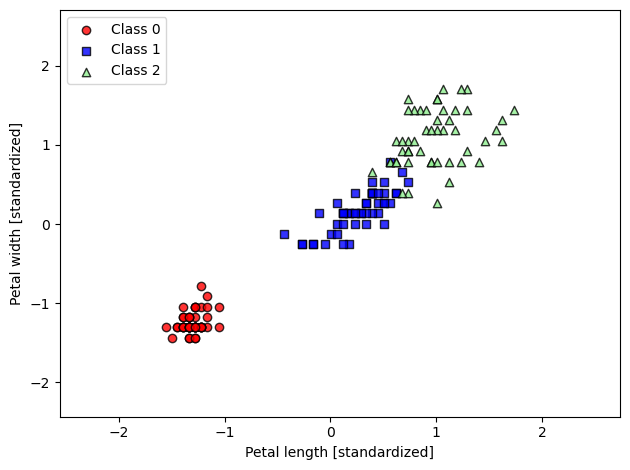

In [10]:
# 분류 전 시각화 해보기
import matplotlib.pyplot as plt

# x, y축 범위 지정하기 위한 최대, 최소값
x1_min, x1_max = X_combined_scaling[:, 0].min() - 1, X_combined_scaling[:, 0].max() + 1
x2_min, x2_max = X_combined_scaling[:, 1].min() - 1, X_combined_scaling[:, 1].max() + 1

# 마커와 색상
markers = ('o', 's', '^')
colors = ('red', 'blue', 'lightgreen')

# 시각화
plt.figure()
for idx, cl in enumerate(np.unique(y_combined)):
    plt.scatter(x = X_combined_scaling[y_combined == cl, 0], y = X_combined_scaling[y_combined == cl, 1],
                alpha = 0.8, c = colors[idx], marker = markers[idx], label = f'Class {cl}', edgecolor = 'black')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# 분류와 시각화를 함수로 설정하기
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):

    # 마커, 컬러맵 설정
    markers = ('o', 's', '^')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스 샘플그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = colors[idx], marker = markers[idx], label = f'Class {cl}', edgecolor='black')

    # 테스트 샘플 부각하기
    if test_idx:
        X_test = X[test_idx, :]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c = 'none', edgecolor = 'black', alpha = 1.0, linewidth = 1, marker = 'o', s = 100, label = 'Test set')

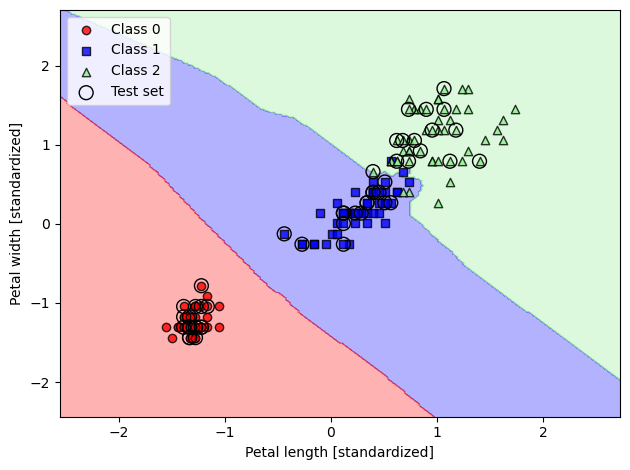

In [12]:
# 분류 및 시각화
from sklearn.neighbors import KNeighborsClassifier as KNN

KNN_model = KNN(n_neighbors = 5, p = 2, metric = 'minkowski')
KNN_model.fit(X_train_scaling, y_train)

plot_decision_regions(X_combined_scaling, y_combined, classifier = KNN_model, test_idx = range(100, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
# 정확도도
accuracy = KNN_model.score(X_test_scaling, y_test)
print(f'accuracy: {accuracy * 100:.2f}%')

accuracy: 100.00%


In [14]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = KNN_model.predict(X_test_scaling)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


# 3. 필기체 숫자 분류 - sklearn

In [15]:
# Data Load
from sklearn import datasets

digits = datasets.load_digits()
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [16]:
# 데이터 사이즈 확인
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


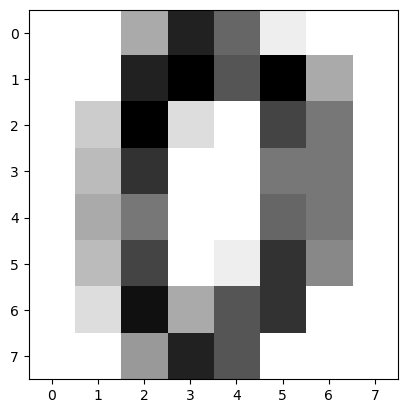

In [17]:
# 샘플 데이터 시각화
import matplotlib.pyplot as plt

plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')

In [18]:
# 이미지 크기 확인
print(digits.images.shape)
print(len(digits.images))

# 8x8 이미지가 1797개

(1797, 8, 8)
1797


In [19]:
# Flattening
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

print(data)
print(data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [20]:
# 트레이닝 / 테스트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [21]:
# 분류 및 학습
from sklearn.neighbors import KNeighborsClassifier as KNN
KNN_model = KNN(n_neighbors = 6)

KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [22]:
# 예측
y_pred = KNN_model.predict(X_test)
print(y_pred[:3])

[5 8 4]


In [23]:
# 평가
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.9833333333333333


[9]


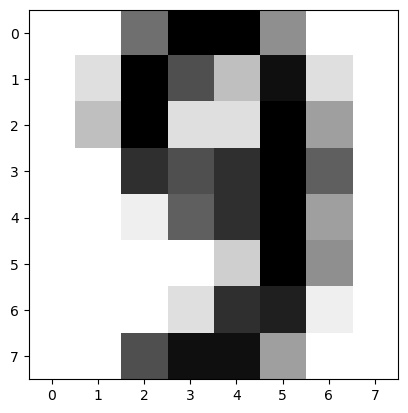

In [25]:
# 시각화
# 이미지를 출력하기 위해서는 평탄화된 이미지를 다시 8x8로 만들어야 한다.
plt.imshow(X_test[5].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')

y_pred = KNN_model.predict([X_test[5]]) # 항상 입력은 2차원
print(y_pred)